In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [27]:
#read the encoded dataset depression
df=pd.read_csv(r"C:\Users\arwah\OneDrive\Desktop\HealthCare Project\datasets\cleaned_data.csv")
df.head(9)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,...,Uncertain Future,Social Media Usage,Drug/Smoking,Favorite Color,Pet Ownership,Daily Coffee Intake,Music Genre Preference,PHQ-9,Cortisol_Level,Depression
0,1,23.0,51,5.0,8.97,2.0,0,0,3,1,...,1,2,1,2,0,1,3,10,6.655000,1
1,0,24.0,3,2.0,5.90,5.0,0,1,10,0,...,2,4,1,4,0,1,4,4,5.123958,0
2,1,17.0,44,3.0,7.03,5.0,2,0,5,0,...,1,5,0,4,1,2,3,4,4.190609,0
3,0,17.0,49,3.0,5.59,2.0,1,1,7,1,...,2,1,1,0,1,4,0,9,7.467984,1
4,0,25.0,16,4.0,8.13,3.0,0,1,16,1,...,1,1,1,1,0,4,3,9,0.406585,0
5,1,25.0,39,2.0,5.70,3.0,2,0,12,0,...,3,5,0,4,1,4,2,7,4.207805,1
6,1,24.0,46,3.0,9.54,4.0,1,0,10,0,...,5,3,1,1,0,0,0,4,4.956508,0
7,0,24.0,6,2.0,8.04,4.0,2,3,11,0,...,5,1,1,4,1,2,2,8,9.909730,1
8,1,19.0,33,3.0,9.79,1.0,1,1,2,1,...,2,1,0,2,0,1,3,19,1.486374,1


In [28]:
X = df.drop(columns=["Depression"])


In [29]:
X.columns 


Index(['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness',
       'Social Isolation', 'Bullying', 'Family Issues', 'Uncertain Future',
       'Social Media Usage', 'Drug/Smoking', 'Favorite Color', 'Pet Ownership',
       'Daily Coffee Intake', 'Music Genre Preference', 'PHQ-9',
       'Cortisol_Level'],
      dtype='object')

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [31]:
X

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,...,Family Issues,Uncertain Future,Social Media Usage,Drug/Smoking,Favorite Color,Pet Ownership,Daily Coffee Intake,Music Genre Preference,PHQ-9,Cortisol_Level
0,1,23.0,51,5.0,8.97,2.0,0,0,3,1,...,2,1,2,1,2,0,1,3,10,6.655000
1,0,24.0,3,2.0,5.90,5.0,0,1,10,0,...,3,2,4,1,4,0,1,4,4,5.123958
2,1,17.0,44,3.0,7.03,5.0,2,0,5,0,...,5,1,5,0,4,1,2,3,4,4.190609
3,0,17.0,49,3.0,5.59,2.0,1,1,7,1,...,3,2,1,1,0,1,4,0,9,7.467984
4,0,25.0,16,4.0,8.13,3.0,0,1,16,1,...,1,1,1,1,1,0,4,3,9,0.406585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27893,0,25.0,45,5.0,5.75,5.0,0,3,11,1,...,1,1,5,1,1,0,1,1,1,2.362973
27894,1,19.0,25,2.0,9.40,3.0,2,0,22,0,...,1,3,5,1,4,1,0,0,5,2.683625
27895,1,23.0,9,3.0,6.61,4.0,0,3,0,0,...,5,4,4,1,2,0,1,2,8,4.565350
27896,0,18.0,25,5.0,6.88,2.0,2,0,11,1,...,4,3,5,0,3,1,0,2,11,9.556027


In [109]:
X_small = X_scaled[:8000]
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_small)

In [110]:
linked = linkage(X_pca, method='ward')

clusters = fcluster(linked, t=2, criterion='maxclust')

In [111]:
silhouette = silhouette_score(X_pca, clusters)
print(f"Silhouette Score for PCA and Hierarchical Clustering: {silhouette}")


Silhouette Score for PCA and Hierarchical Clustering: 0.35576378354351096


In [112]:
X_small_df = pd.DataFrame(X_pca, columns=["PCA 1", "PCA 2"])

X_small_df["Cluster"] = clusters

print(X_small_df["Cluster"].value_counts())


Cluster
2    5336
1    2664
Name: count, dtype: int64


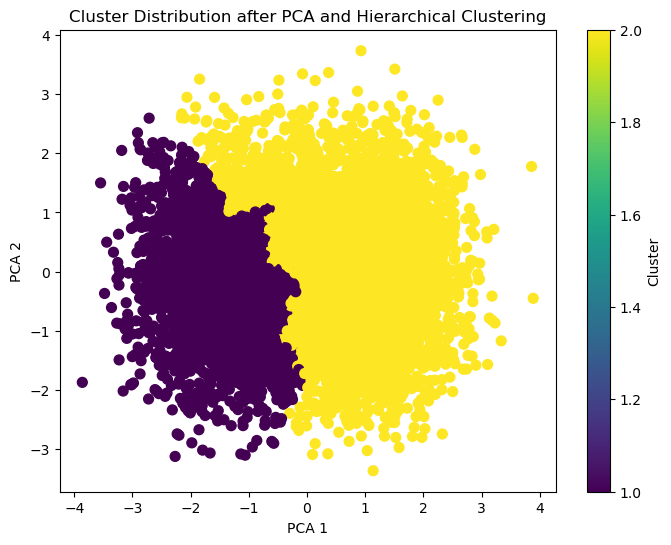

In [113]:
plt.figure(figsize=(8, 6))
plt.scatter(X_small_df["PCA 1"], X_small_df["PCA 2"], c=X_small_df["Cluster"], cmap='viridis', s=50)
plt.title("Cluster Distribution after PCA and Hierarchical Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.show()